<a href="https://colab.research.google.com/github/diogobertozi/IA/blob/main/base_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

#Carrega a base de dados Iris
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)


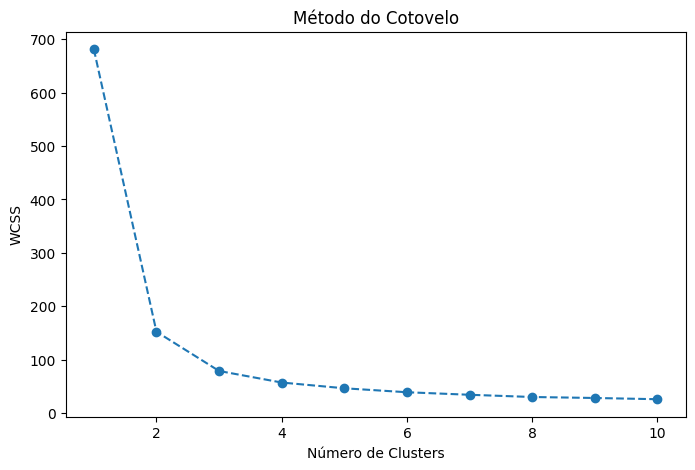

In [ ]:
#Método do cotovelo para encontrar o melhor número de clusters
wcss = []  #Within-Cluster Sum of Squares (soma das distâncias dos pontos ao centroide do cluster)

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.title('Método do Cotovelo')
plt.show()

In [ ]:
#Aplica K-Means com o número ótimo de clusters (k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)
X['K-Means Cluster'] = kmeans_labels

In [ ]:
#Aplica Clusterização Hierárquica (Linkage)
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X.iloc[:, :-1])
X['Hierarchical Cluster'] = hierarchical_labels

In [ ]:
#Visualizar os clusters com PCA (Redução para 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.iloc[:, :-2])
X['PCA1'] = X_pca[:, 0]
X['PCA2'] = X_pca[:, 1]

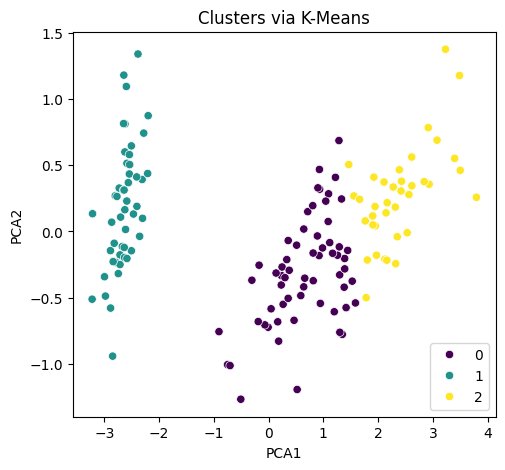

In [ ]:
#Gráfico K-Means
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue=X['K-Means Cluster'], palette='viridis', data=X)
plt.title('Clusters via K-Means')
plt.legend()

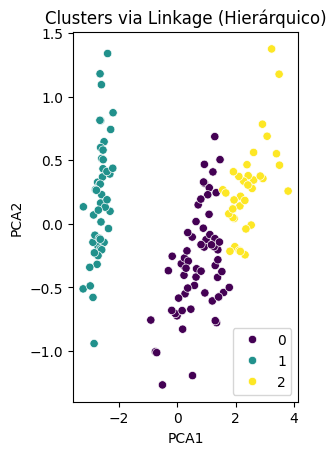

In [ ]:
#Gráfico Hierárquico
plt.subplot(1, 2, 2)
sns.scatterplot(x='PCA1', y='PCA2', hue=X['Hierarchical Cluster'], palette='viridis', data=X)
plt.title('Clusters via Linkage (Hierárquico)')
plt.legend()
plt.show()

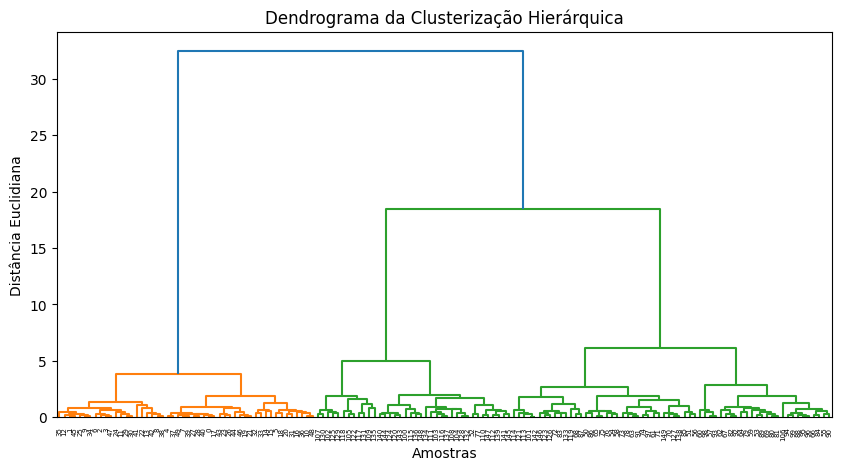

In [ ]:
#Criar o dendrograma para visualizar a hierarquia dos clusters
plt.figure(figsize=(10, 5))
linkage_matrix = linkage(X.iloc[:, :-3], method='ward')
dendrogram(linkage_matrix)
plt.title('Dendrograma da Clusterização Hierárquica')
plt.xlabel('Amostras')
plt.ylabel('Distância Euclidiana')
plt.show()